## 1. Introduction

### 1.1. Problem Statement
The primary goal is to **develop a predictive model** that can accurately estimate the price of a car based on its features. This problem arises because car buyers and sellers often need to determine a fair and competitive market price for vehicles. For instance:

- Buyers want assurance they aren't overpaying.
- Sellers aim to set a reasonable price to attract buyers while maximizing profits.

Key challenges involve:
- Identifying which car features (e.g., brand, horsepower, mileage) significantly impact the price.
- Handling missing, irrelevant, or complex data that might introduce bias.
- Ensuring the model is generalizable for cars not present in the dataset.

### 1.2. Objective of the Analysis
The primary goal of this exploratory data analysis (EDA) is to gain insights into the factors influencing car prices by examining the data in "CarPrice_Assignment.csv." This involves:

- Understanding patterns and trends in the dataset, such as relationships between car attributes (e.g., brand, mileage, horsepower) and price.
- Identifying key features that contribute to price variability.
- Detecting and addressing missing, inconsistent, or outlier data to ensure model reliability.
- Preparing the dataset for building a predictive model by transforming and engineering relevant features.

By the end of the EDA, the aim is to lay the foundation for developing a robust machine learning model that can accurately predict car prices based on a vehicle’s features.

### 1.3. Dataset Description

The "CarPrice_Assignment.csv" dataset contains information about various cars and their respective prices, aiming to capture the relationships between a car’s features and its market value. The dataset includes:

- **Source**: https://www.kaggle.com/datasets/aminesnoussi/carprice-assignmentcsv
- **Number of Rows (Observations)**: The dataset contains 205 rows, where each row represents a unique car.
- **Number of Features**: There are 26 columns (features), including the target variable (`price`). These features capture car specifications like:
  - **Car_ID**: Unique identifier for each car.
  - **Symboling**: Risk factor associated with the car.
  - **CarName**: Brand and model of the car.
  - **Fuel type** (e.g., petrol/diesel).
  - **Horsepower**: Engine power.
  - **Mileage**: Fuel efficiency (city and highway).
  - **Price**: Target variable, indicating the price of the car.

The dataset is well-suited for regression tasks and provides a mix of numeric and categorical data, making it ideal for feature engineering and analysis.

### 2. Data Loading and Setup

In [6]:
## 2.1. Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
## 2.2. Load Dataset
df = pd.read_csv('CarPrice_Assignment.csv')  # Replace with your dataset path

In [8]:
# Quick look
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
# Adjust pandas setting to display all columns.
pd.set_option('display.max_columns', None)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


### 3. Understand the Dataset Structure

In [11]:
# A function for stylish view
def print_section(title):
    print("\n" + "=" * len(title))
    print(title)
    print("=" * len(title) + "\n")

In [12]:
## 3.1. Display Basic Information
print_section('Shape of the dataset')
print("Shape:", df.shape)
print_section('Basic info:')
df.info()


Shape of the dataset

Shape: (205, 26)

Basic info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    obj

In [13]:
# 3.2. Summary Statistics
# Numerical columns
print_section('Statistics of Numerical columns')
print(df.describe())

# Categorical columns
print_section('Statistics of Categorical columns')
print(df.describe(include='object'))

print_section('Number of unique values in features:')
print(df.nunique())


Statistics of Numerical columns

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     

### 4. Data Cleaning

In [15]:
## 4.1. Handling Missing Values
print(df.isnull().sum())

# Comment: No Missing value found.

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [16]:
## 4.2. Handling Duplicates
print("Duplicates:", df.duplicated().sum())

# Comment: No duplicate value found.

Duplicates: 0


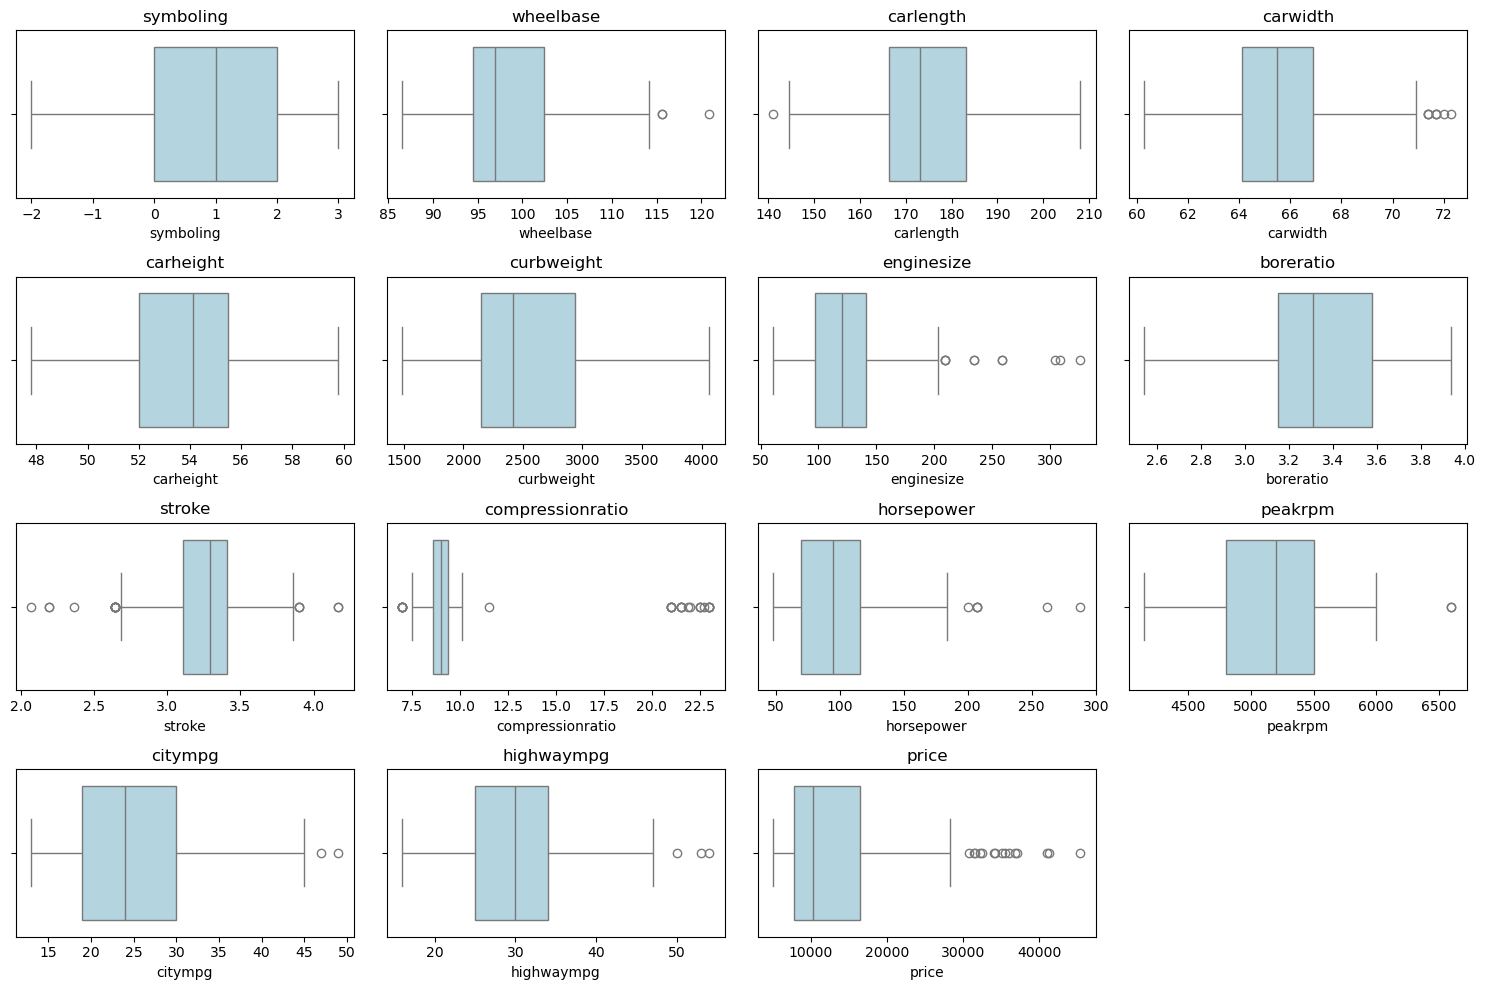

"\nComment:\nBoxplots for all continuous features reveal the presence of outliers in several variables. \nNotably, features like 'price', 'horsepower', 'enginesize', and 'curbweight' show significant deviations\nfrom the interquartile range, indicating potential outliers.\nThese outliers may influence model performance and should be considered for treatment using \nmethods such as capping, transformation, or removal depending on the context.\n"

In [17]:
## 4.5. Handling Outliers of Continuous Features

numeric_df = df.select_dtypes(include=['int64', 'float64']).drop(columns=['car_ID'])
plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4,4,i+1)
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f"{col}")
plt.tight_layout()
plt.show()
"""
Comment:
Boxplots for all continuous features reveal the presence of outliers in several variables. 
Notably, features like 'price', 'horsepower', 'enginesize', and 'curbweight' show significant deviations
from the interquartile range, indicating potential outliers.
These outliers may influence model performance and should be considered for treatment using 
methods such as capping, transformation, or removal depending on the context.
"""

### 5. Univariate Analysis (Single Variable)

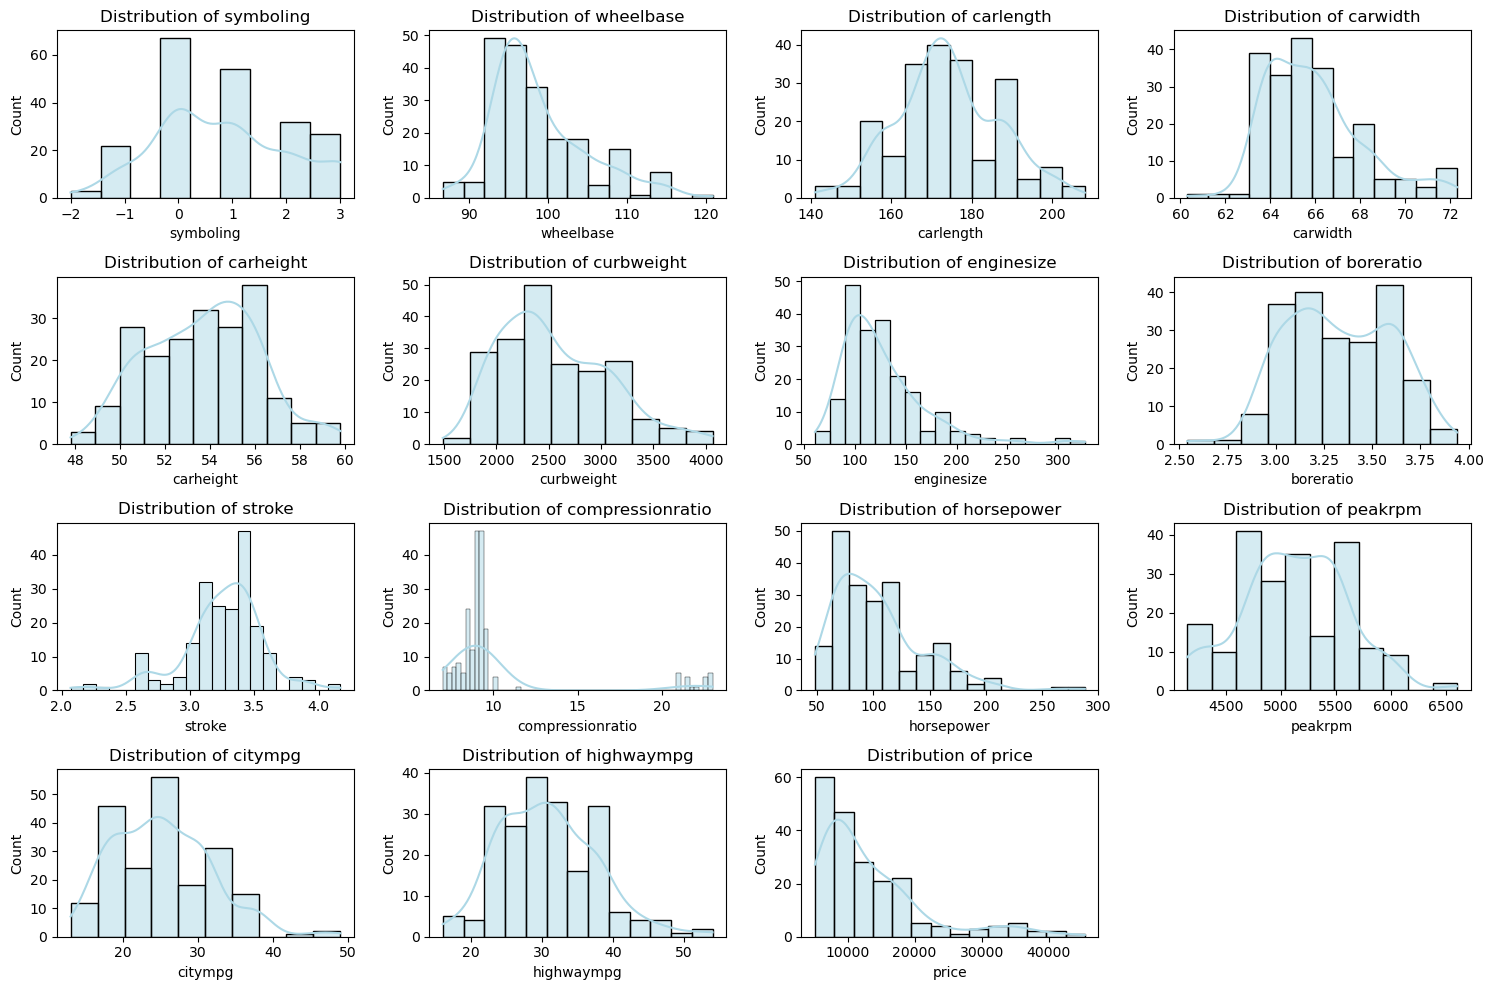

In [19]:
## 5.1. Numerical Variables

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_df.columns):
    plt.subplot(4,4,i+1)
    sns.histplot(x=numeric_df[col], kde = True, color='lightblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Comment:
# The distribution plots help us understand the underlying patterns and skewness of the numerical features.
# Several variables such as 'price', 'horsepower', 'wheelbase' and 'enginesize' exhibit right-skewed distributions,
# suggesting the presence of high-value outliers or a long tail of higher values.
# On the other hand, features like 'citympg' and 'highwaympg' appear more normally distributed.
# These insights will be useful for choosing appropriate transformation techniques or model assumptions.

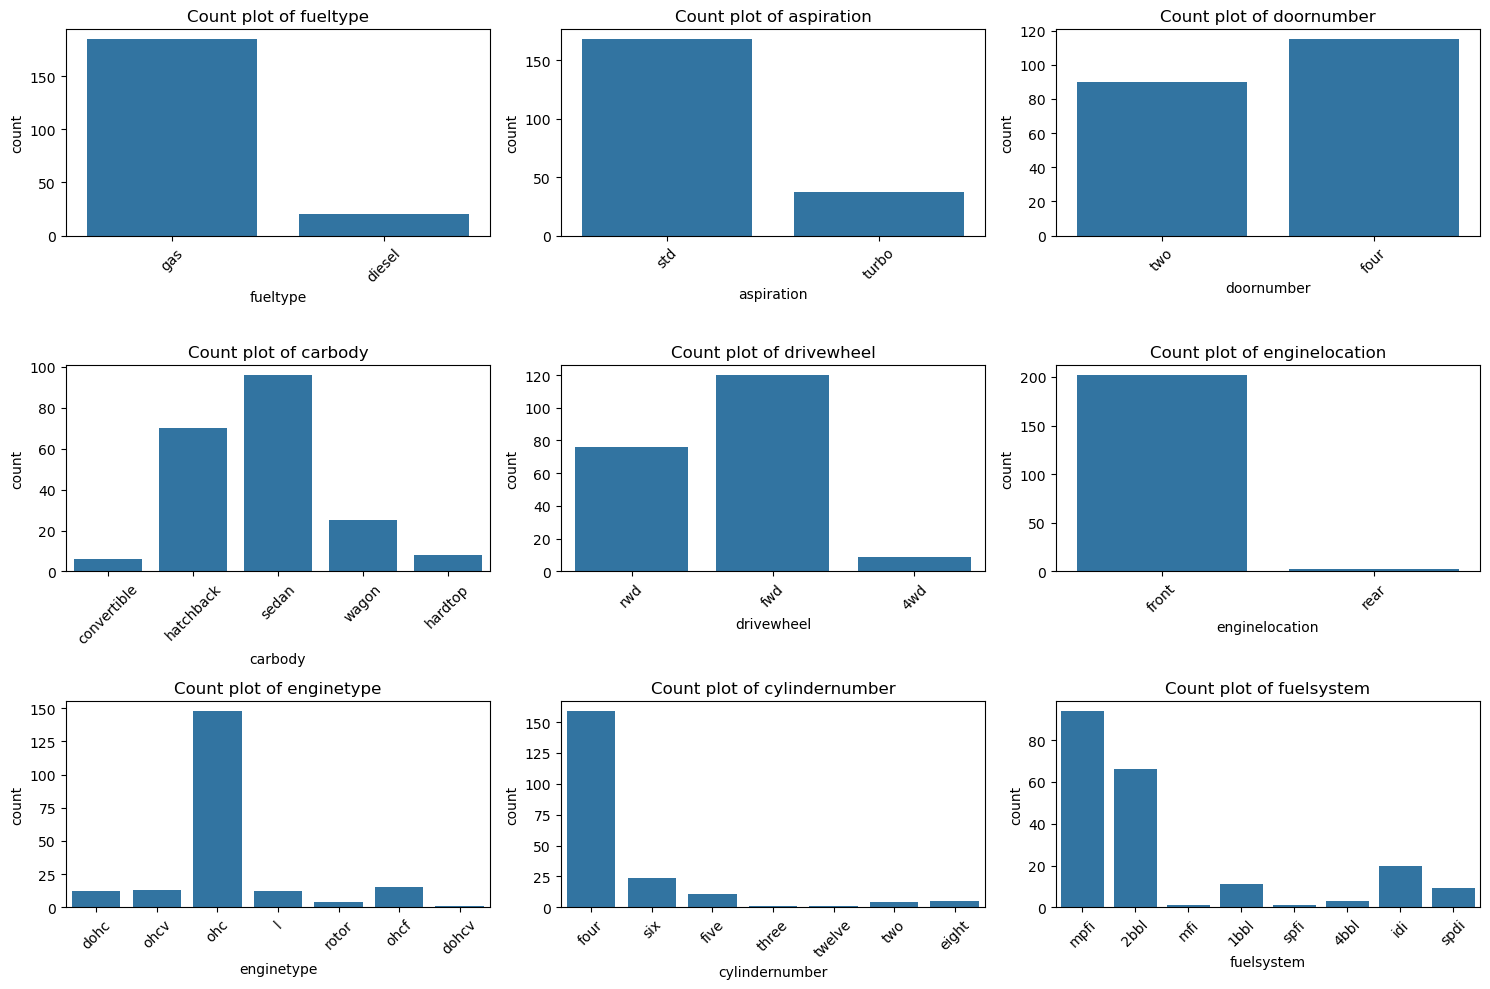

"\nComment:\nThe count plots display the frequency distribution of each categorical variable.\nWe observe that some features, such as 'fueltype', 'aspiration', and 'enginelocation', have imbalanced distributions,\nwhile others like 'carbody', 'drivewheel', 'enginetype', 'fuelsystem' show more diversity across categories.\nUnderstanding these distributions helps in encoding strategies and identifying any potential class imbalance\nthat may affect model training.\n"

In [20]:
## 5.2. Categorical Variables
cat_df = df.select_dtypes(include='object').drop(columns=['CarName'])
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_df.columns):
    plt.subplot(3,3,i+1)
    sns.countplot(data=cat_df, x=col)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"""
Comment:
The count plots display the frequency distribution of each categorical variable.
We observe that some features, such as 'fueltype', 'aspiration', and 'enginelocation', have imbalanced distributions,
while others like 'carbody', 'drivewheel', 'enginetype', 'fuelsystem' show more diversity across categories.
Understanding these distributions helps in encoding strategies and identifying any potential class imbalance
that may affect model training.
"""

### 6. Bivariate and Multivariate Analysis

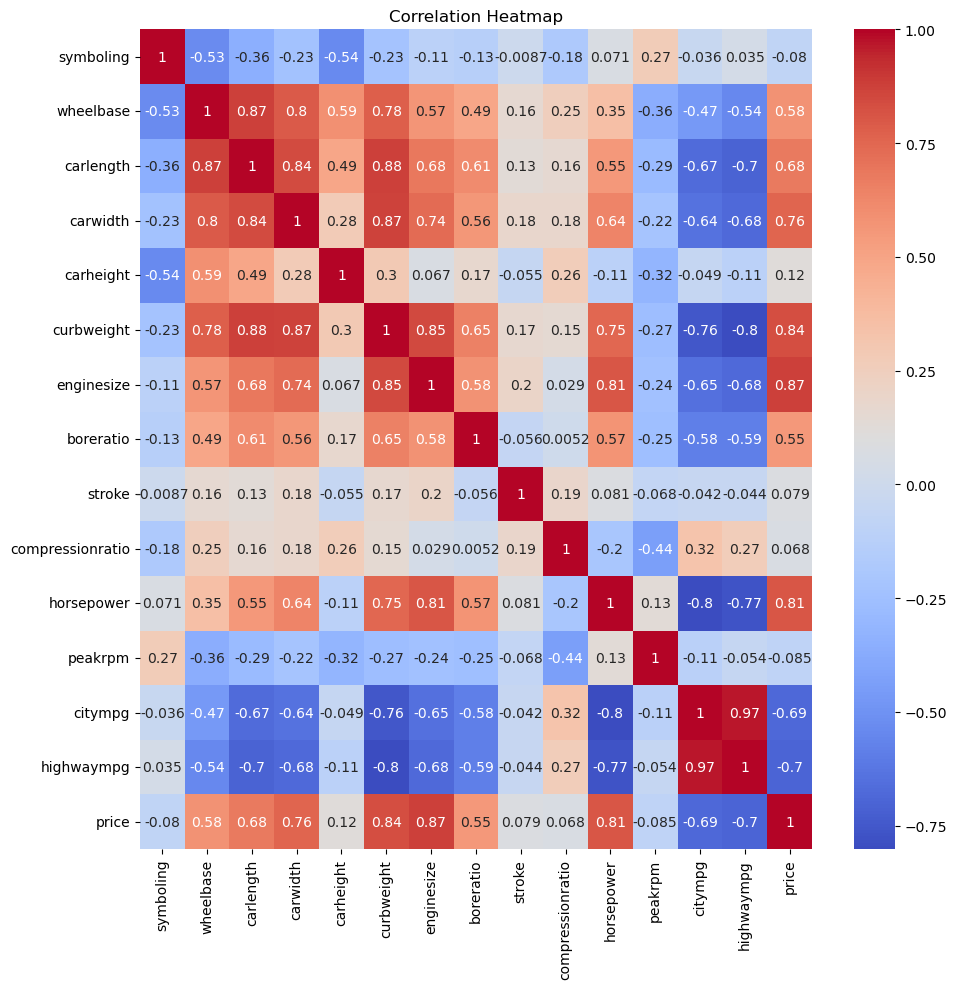

In [22]:
## 6.1. Numerical vs Numerical
plt.figure(figsize=(10,10))
sns.heatmap(df[numeric_df.columns].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

# Comment:
# The correlation heatmap reveals the strength and direction of linear relationships between numerical features.
# Features such as 'enginesize', 'curbweight', 'horsepower', and 'carwidth' show strong positive correlations with 'price',
# suggesting they could be important predictors in modeling.
# On the other hand, variables like 'citympg' and 'highwaympg' exhibit strong negative correlation with 'price',
# indicating that more fuel-efficient cars tend to be lower in price.
# These insights help in feature selection and understanding multicollinearity in the dataset.

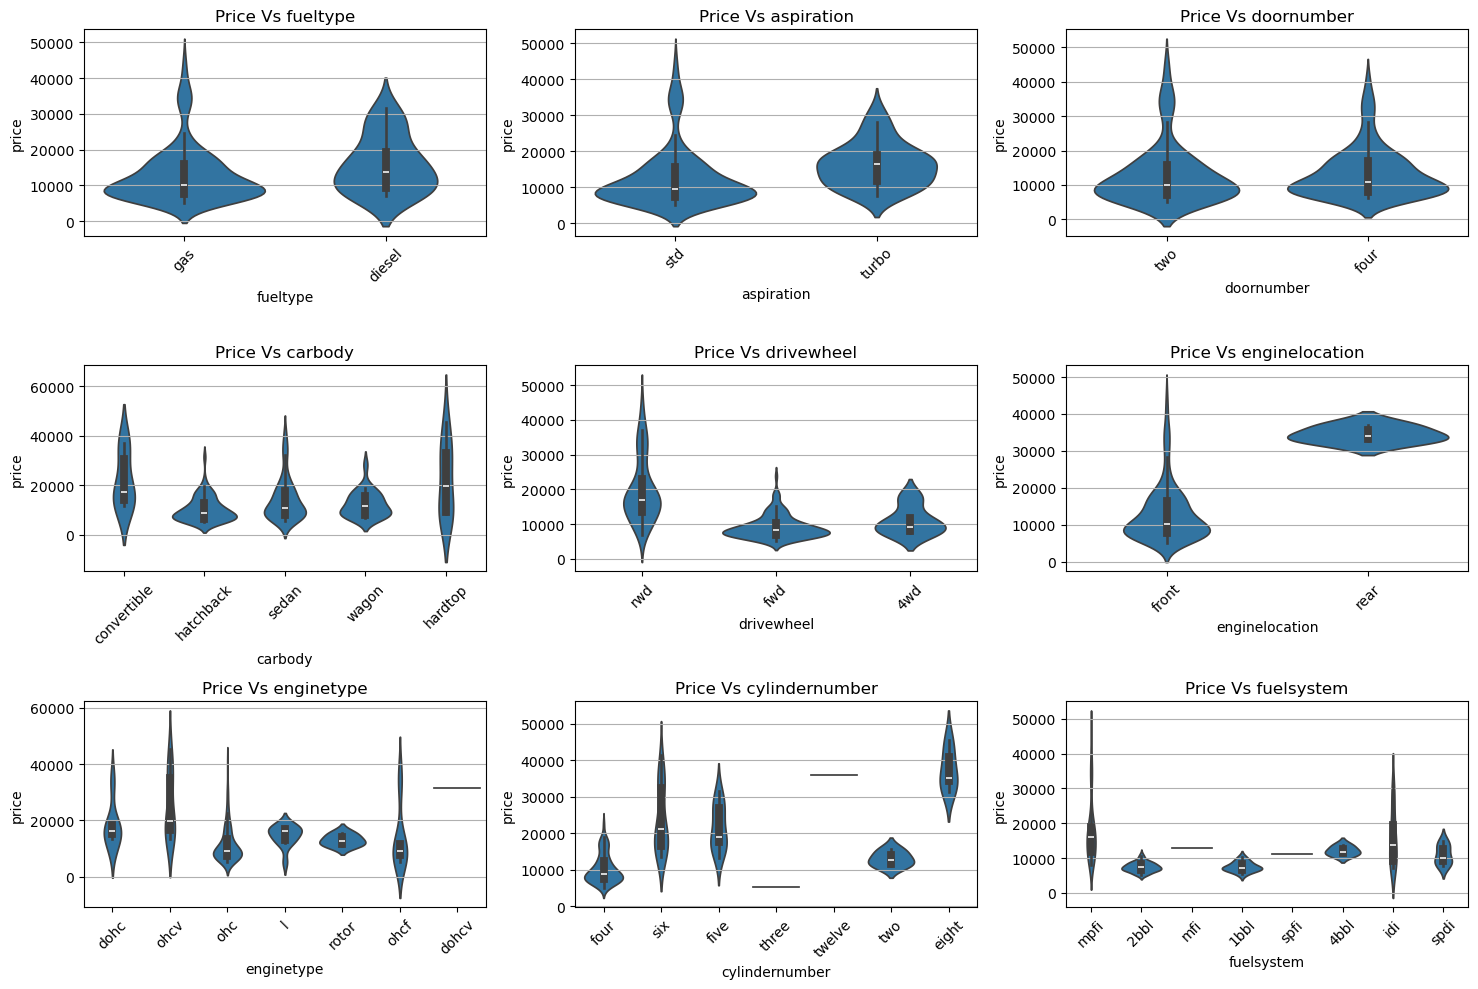

In [23]:
## 6.2. Categorical vs Numerical

plt.figure(figsize=(15,10))
for i, col in enumerate(cat_df.columns):
    plt.subplot(3,3,i+1)
    sns.violinplot(data= df, x=col, y='price')
    plt.title(f'Price Vs {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Comment:
# The violin plots illustrate how the distribution of car prices varies across different categories
# of each categorical feature. Features like 'cylindernumber'carbody', 'drivewheel', 'enginelocation', and 'enginetype'
# show noticeable differences in both the spread and central tendency of price across their categories.
# For example, cars with rear engine location or more premium car bodies tend to have higher price ranges.
# These plots help identify categorical variables that significantly influence car pricing.

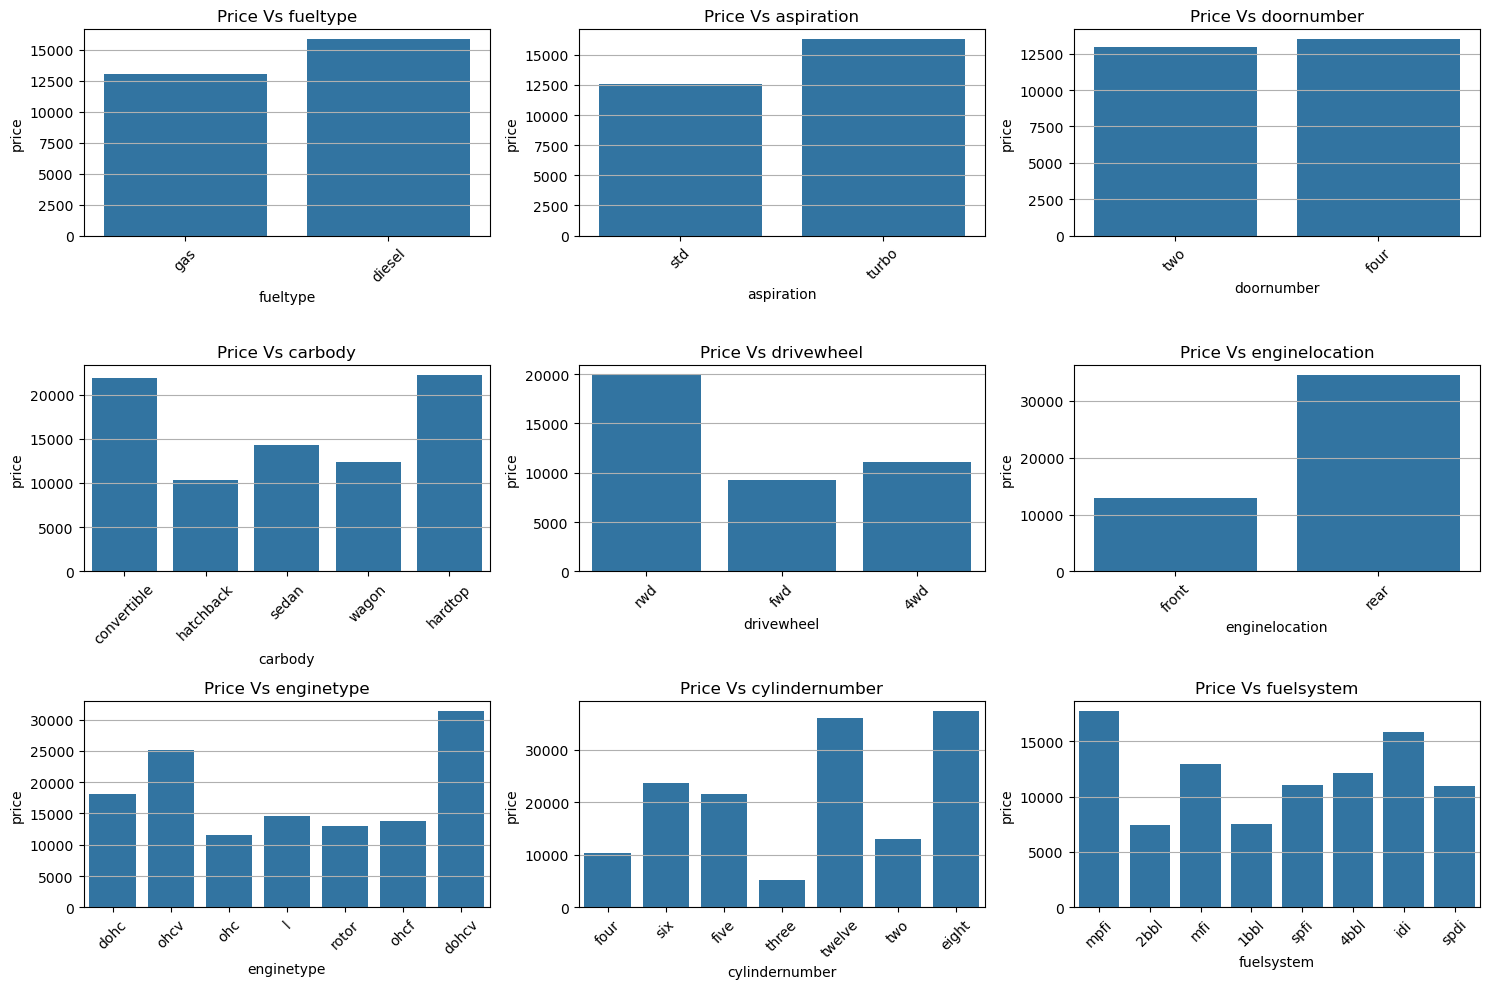

"\nComment:\nThe bar plots suggest that several categorical features show a noticeable impact on car prices.\nIn particular, features like 'carbody', 'drivewheel', 'enginelocation', 'enginetype', \n'cylindernumber', and 'fuelsystem' display significant variation in average price across categories.\nThese variables may play an important role in predicting car price.\n"

In [24]:
# 6.3. Barplot: target feature vs categorical features
plt.figure(figsize=(15,10))
for i, col in enumerate(cat_df.columns):
    plt.subplot(3,3,i+1)
    sns.barplot(data= df, x=col, y='price', errorbar=None)
    plt.title(f'Price Vs {col}')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
plt.tight_layout()
plt.show()

"""
Comment:
The bar plots suggest that several categorical features show a noticeable impact on car prices.
In particular, features like 'carbody', 'drivewheel', 'enginelocation', 'enginetype', 
'cylindernumber', and 'fuelsystem' display significant variation in average price across categories.
These variables may play an important role in predicting car price.
"""

### 7. Feature Engineering

In [26]:
## 7.1. Creating New Features
# Extract the brand and model from CarName

df['brand'] = df['CarName'].str.split(' ').str[0]
df['model'] = df['CarName'].str.split(' ').str[1]

# Move the brand column to the 3rd position (index 2 since indexing starts at 0)
df.insert(2, 'brand', df.pop('brand'))
df.insert(3, 'model', df.pop('model'))

In [27]:
# Cleaning of 'brand' feature
df['brand'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [28]:
# Replace incorrect spellings in the brand column
corrections = {
    'maxda': 'mazda',
    'Nissan': 'nissan',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen'
}

# Apply the corrections to the brand column
df['brand'] = df['brand'].replace(corrections)

In [29]:
# Drop the 'CarName' feature
df.drop(columns=['CarName'], inplace=True)

In [30]:
# Saving cleaned dataset
cleaned_file_name = "Cleaned_CarPrice.csv"
df.to_csv(cleaned_file_name, index=False)  # Saves without row indices
print(f"Dataset saved as {cleaned_file_name}")

Dataset saved as Cleaned_CarPrice.csv


### 8. Data Visualization

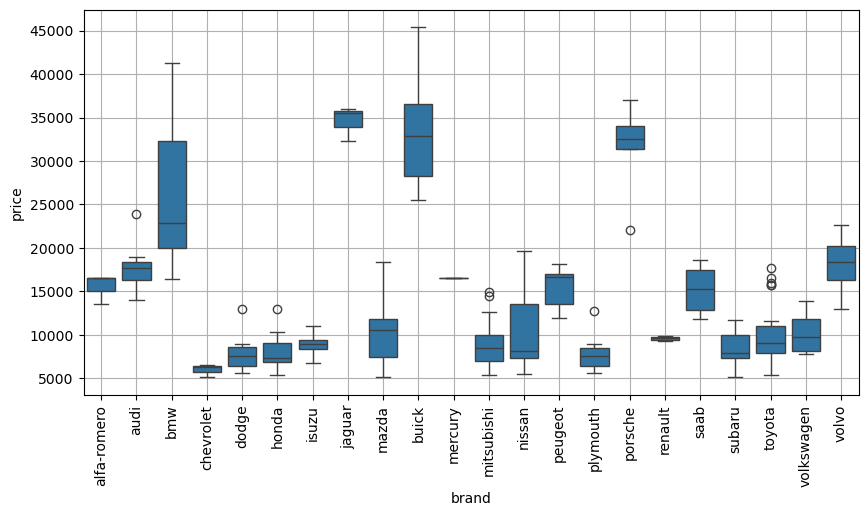

In [32]:
# 8.1 Data Visualization on new feature
# Relatin between new feature 'brand' with 'price'
fig=plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='brand', y='price')
plt.xticks(rotation=90)
plt.grid(axis='both')
plt.show()

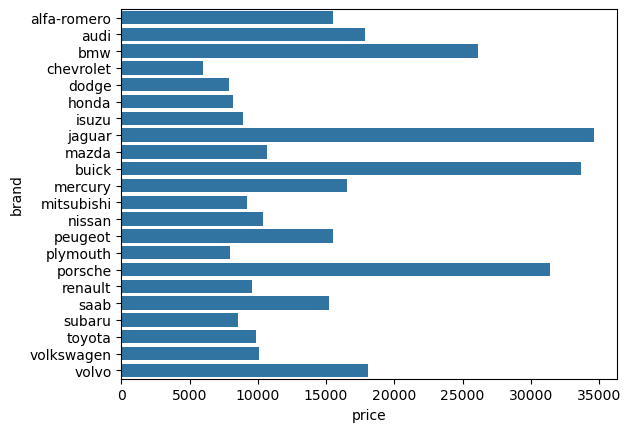

In [33]:
# 8.2 Data Visualization on new feature
# Average price of each brand
sns.barplot(data=df,y='brand', x='price', errorbar=None)
plt.show()

# Comment:
# The bar plot visualizes the average car price for each brand in the dataset.
# Premium brands such as 'bmw', 'buick', 'jaguar', and 'porsche' have significantly higher average prices,
# indicating their positioning in the luxury or performance segment.
# On the other hand, economy brands like 'chevrolet', 'dodge', 'plymouth', and 'isuzu' are priced much lower,
# reflecting their focus on affordability and utility.
# Interestingly, some brands like 'volkswagen' and 'toyota' fall into the mid-range, suggesting balanced offerings.
# This brand-level pricing analysis is useful for understanding market segmentation and consumer targeting strategies.

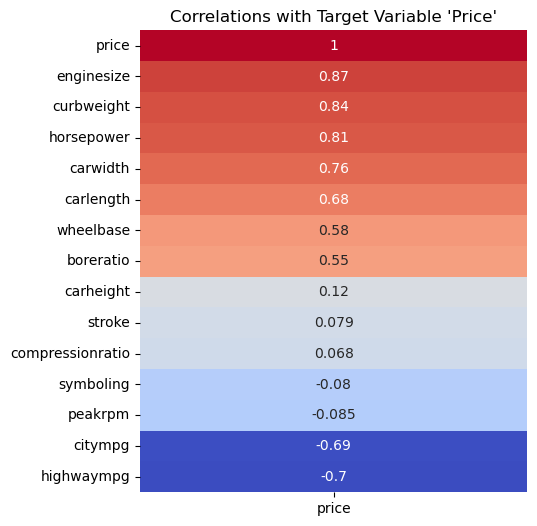

In [34]:
# A heatmap showing the strongest correlations with the target variable (price).
 
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Select the correlations with the target variable 'price'
target_correlations = correlation_matrix[["price"]].sort_values(by="price", ascending=False)

# Plot the heatmap for strongest correlations
plt.figure(figsize=(5, 6))
sns.heatmap(target_correlations, annot=True, cmap="coolwarm", cbar=False)
plt.title("Correlations with Target Variable 'Price'")
plt.show()

### 9. Statistical Summary & Insights

In [36]:
## 9.1. Summary Stats
print(df.describe())

           car_ID   symboling   wheelbase   carlength    carwidth   carheight  \
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000   
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio  \
count   205.000000  205.000000  205.000000  205.000000        205.000000   
mean   2555.565854  126.907317    3.329756    3.255415         10.142537   
std     520.680204   41.642693    0.270844

In [37]:
## 9.2. Skewness and Kurtosis
print_section('Skewness')
print(numeric_df.skew())
print_section('Kurtosis')
print(numeric_df.kurt())


Skewness

symboling           0.211072
wheelbase           1.050214
carlength           0.155954
carwidth            0.904003
carheight           0.063123
curbweight          0.681398
enginesize          1.947655
boreratio           0.020156
stroke             -0.689705
compressionratio    2.610862
horsepower          1.405310
peakrpm             0.075159
citympg             0.663704
highwaympg          0.539997
price               1.777678
dtype: float64

Kurtosis

symboling          -0.676271
wheelbase           1.017039
carlength          -0.082895
carwidth            0.702764
carheight          -0.443812
curbweight         -0.042854
enginesize          5.305682
boreratio          -0.785042
stroke              2.174396
compressionratio    5.233054
horsepower          2.684006
peakrpm             0.086756
citympg             0.578648
highwaympg          0.440070
price               3.051648
dtype: float64
